- Note: 
        - RNAs longer than the fixed length were truncated to the fixed length and replaced by the part with original 5 or 3 prime sequence. 
        - RNAs shorter than the fixed length were truncate_keep with 'N' after 3 prime of RNA sequence
        

        AUROCs of truncating to keep original 5 prime are from RNAlight_Private/lncRNA/03_Model_Construction/02_Deep_Learning_Model/01_DL_Model_Output of each model 
        AUROCs of truncating to keep original 3 prime are from   lncRNA/5_prime_truncating/01_DL_Model_Output of each model

- Cross valiadation: highest mean_auroc_on_CV in CV_result.tsv
-  Test: AUROC in Evaluate_Result_TestSet.txt

In [23]:
lncRNA_CNN_truncate_keep_5_prime_CV <- data.frame(list(AUC=c(0.6368961, 0.64568084, 0.64076245, 0.643695, 0.6319648),model="CNN",truncate_keep="Five"))
lncRNA_CNN_RNN_truncate_keep_5_prime_CV <- data.frame(list(AUC=c(0.6281113, 0.6339678, 0.643695, 0.61730206, 0.65542525),model="CNN_RNN",truncate_keep="Five"))

lncRNA_CNN_truncate_keep_3_prime_CV <- data.frame(list(AUC=c(0.6427526, 0.6325037, 0.64662755, 0.6422287, 0.6451613),model="CNN",truncate_keep="Three"))
lncRNA_CNN_RNN_truncate_keep_3_prime_CV <- data.frame(list(AUC=c(0.6486091, 0.6193265, 0.6422287, 0.6451613, 0.64076245),model="CNN_RNN",truncate_keep="Three"))

In [24]:
lncRNA_CV_df <- rbind(lncRNA_CNN_truncate_keep_5_prime_CV,lncRNA_CNN_RNN_truncate_keep_5_prime_CV,lncRNA_CNN_truncate_keep_3_prime_CV,lncRNA_CNN_RNN_truncate_keep_3_prime_CV)
lncRNA_CV_df$model <- factor(lncRNA_CV_df$model,levels=c("CNN","CNN_RNN"))
lncRNA_CV_df$truncate_keep <- factor(lncRNA_CV_df$truncate_keep,levels=c("Five","Three"))

In [25]:
t.test(c(0.6368961, 0.64568084, 0.64076245, 0.643695, 0.6319648),c(0.6427526, 0.6325037, 0.64662755, 0.6422287, 0.6451613))


	Welch Two Sample t-test

data:  c(0.6368961, 0.64568084, 0.64076245, 0.643695, 0.6319648) and c(0.6427526, 0.6325037, 0.64662755, 0.6422287, 0.6451613)
t = -0.59001, df = 7.9997, p-value = 0.5715
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.010086471  0.005976607
sample estimates:
mean of x mean of y 
0.6397998 0.6418548 


In [26]:
t.test(c(0.6281113, 0.6339678, 0.643695, 0.61730206, 0.65542525),c(0.6486091, 0.6193265, 0.6422287, 0.6451613, 0.64076245))


	Welch Two Sample t-test

data:  c(0.6281113, 0.6339678, 0.643695, 0.61730206, 0.65542525) and c(0.6486091, 0.6193265, 0.6422287, 0.6451613, 0.64076245)
t = -0.42302, df = 7.5898, p-value = 0.684
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.02287315  0.01583849
sample estimates:
mean of x mean of y 
0.6357003 0.6392176 


In [27]:
library(ggplot2)

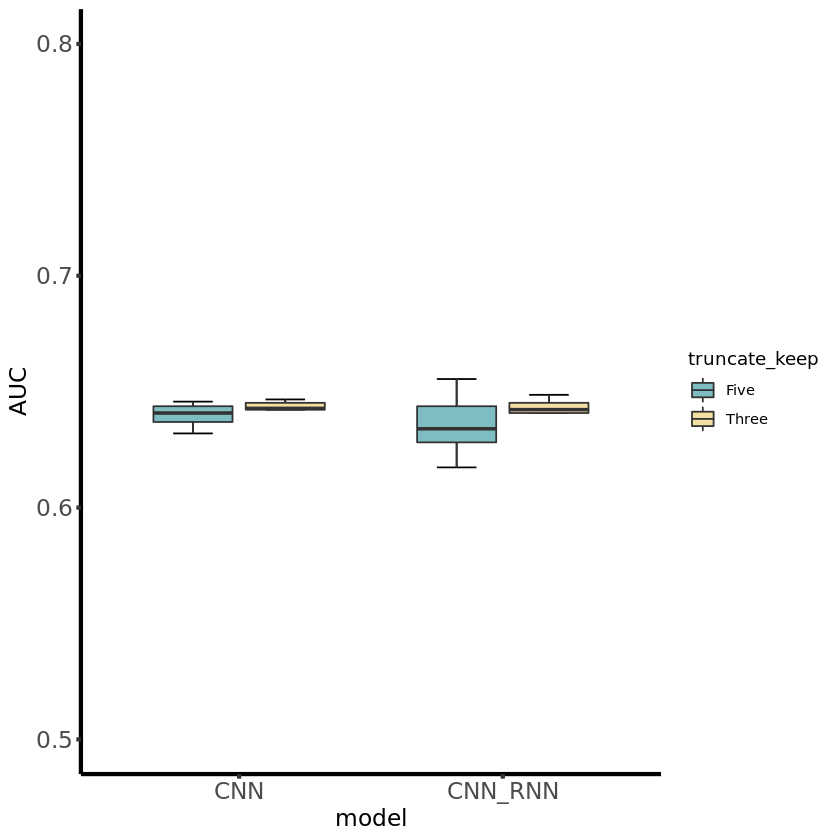

In [28]:
p_box <- ggplot(lncRNA_CV_df,aes(x=model,y=AUC,fill = truncate_keep))+
stat_boxplot(geom = "errorbar",width=0.3,position = position_dodge(0.7))+
geom_boxplot(width = 0.6,outlier.color="white",position = position_dodge(0.7))+
ylim(0.5,0.8)+theme_classic()+
scale_fill_manual(values=c("#7ebdc2","#f3dfa2"))+
theme(axis.text = element_text(size=14),
axis.title = element_text(size=14),
element_line(size = 1.2))

ggsave("./RNAlight_lncRNA_truncate_CV_Result_with_text.pdf", p_box, width = 10, height = 10)
p_box

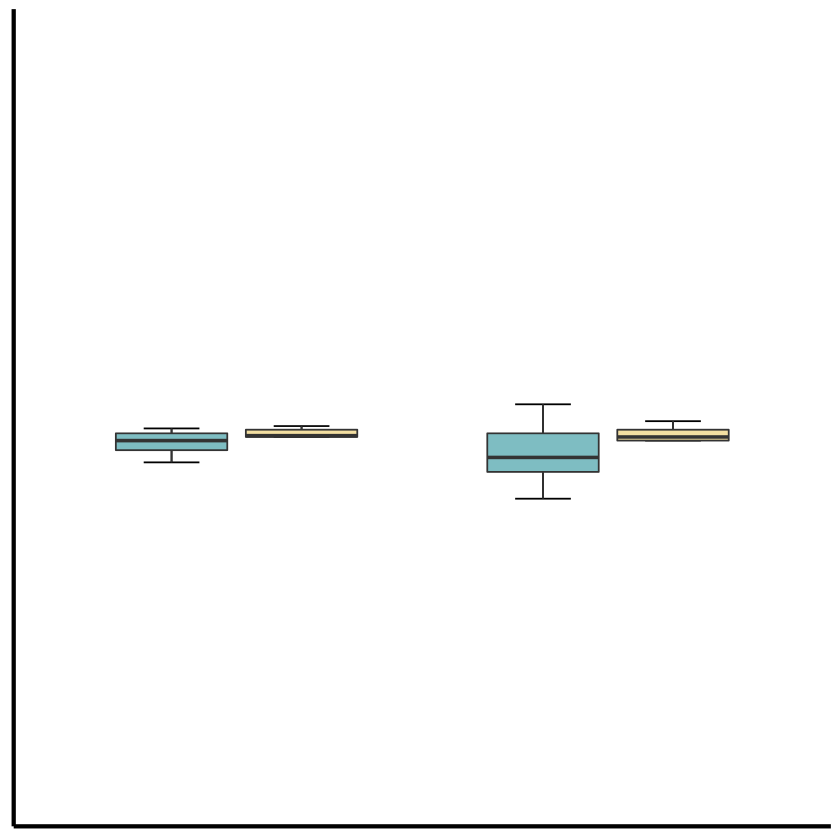

In [29]:
p_box2 <- p_box + theme(axis.text = element_blank(),axis.title = element_blank(),axis.ticks = element_blank(),legend.position = "None")
ggsave("./RNAlight_lncRNA_truncate_CV_Result.pdf", p_box2, width = 10, height = 10)
p_box2

In [30]:
mRNA_CNN_truncate_keep_5_prime_CV <- data.frame(list(AUC=c(0.676313, 0.6773848, 0.65450644, 0.68454933, 0.6727468),model="CNN",truncate_keep="Five"))
mRNA_CNN_RNN_truncate_keep_5_prime_CV <- data.frame(list(AUC=c(0.58949625, 0.5616292, 0.62339056, 0.5965665, 0.6083691),model="CNN_RNN",truncate_keep="Five"))

mRNA_CNN_truncate_keep_3_prime_CV <- data.frame(list(AUC=c(0.6602358, 0.6580922, 0.666309, 0.6877682, 0.71781117),model="CNN",truncate_keep="Three"))
mRNA_CNN_RNN_truncate_keep_3_prime_CV <- data.frame(list(AUC=c(0.58949625, 0.56806004, 0.62339056, 0.5858369, 0.6137339),model="CNN_RNN",truncate_keep="Three"))

In [31]:
mRNA_CV_df <- rbind(mRNA_CNN_truncate_keep_5_prime_CV,mRNA_CNN_RNN_truncate_keep_5_prime_CV,mRNA_CNN_truncate_keep_3_prime_CV,mRNA_CNN_RNN_truncate_keep_3_prime_CV)
mRNA_CV_df$model <- factor(mRNA_CV_df$model,levels=c("CNN","CNN_RNN"))
mRNA_CV_df$truncate_keep <- factor(mRNA_CV_df$truncate_keep,levels=c("Five","Three"))

In [32]:
t.test(c(0.6602358, 0.6580922, 0.666309, 0.6877682, 0.71781117),c(0.676313, 0.6773848, 0.65450644, 0.68454933, 0.6727468))


	Welch Two Sample t-test

data:  c(0.6602358, 0.6580922, 0.666309, 0.6877682, 0.71781117) and c(0.676313, 0.6773848, 0.65450644, 0.68454933, 0.6727468)
t = 0.40131, df = 5.538, p-value = 0.7032
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.02581728  0.03570368
sample estimates:
mean of x mean of y 
0.6780433 0.6731001 


In [33]:
t.test(c(0.58949625, 0.56806004, 0.62339056, 0.5858369, 0.6137339),c(0.58949625, 0.5616292, 0.62339056, 0.5965665, 0.6083691))


	Welch Two Sample t-test

data:  c(0.58949625, 0.56806004, 0.62339056, 0.5858369, 0.6137339) and c(0.58949625, 0.5616292, 0.62339056, 0.5965665, 0.6083691)
t = 0.014858, df = 7.9913, p-value = 0.9885
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.03288268  0.03330910
sample estimates:
mean of x mean of y 
0.5961035 0.5958903 


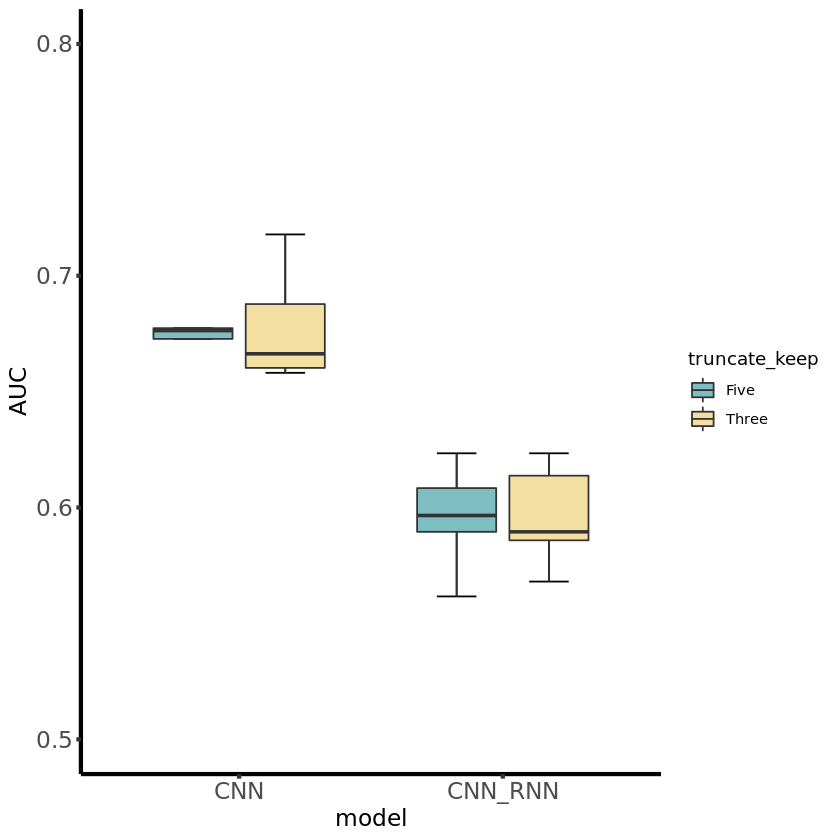

In [34]:
p_box <- ggplot(mRNA_CV_df,aes(x=model,y=AUC,fill = truncate_keep))+
stat_boxplot(geom = "errorbar",width=0.3,position = position_dodge(0.7))+
geom_boxplot(width = 0.6,outlier.color="white",position = position_dodge(0.7))+
ylim(0.5,0.8)+theme_classic()+
scale_fill_manual(values=c("#7ebdc2","#f3dfa2"))+
theme(axis.text = element_text(size=14),
axis.title = element_text(size=14),
element_line(size = 1.2))

ggsave("./RNAlight_mRNA_truncate_CV_Result_with_text.pdf", p_box, width = 10, height = 10)
p_box

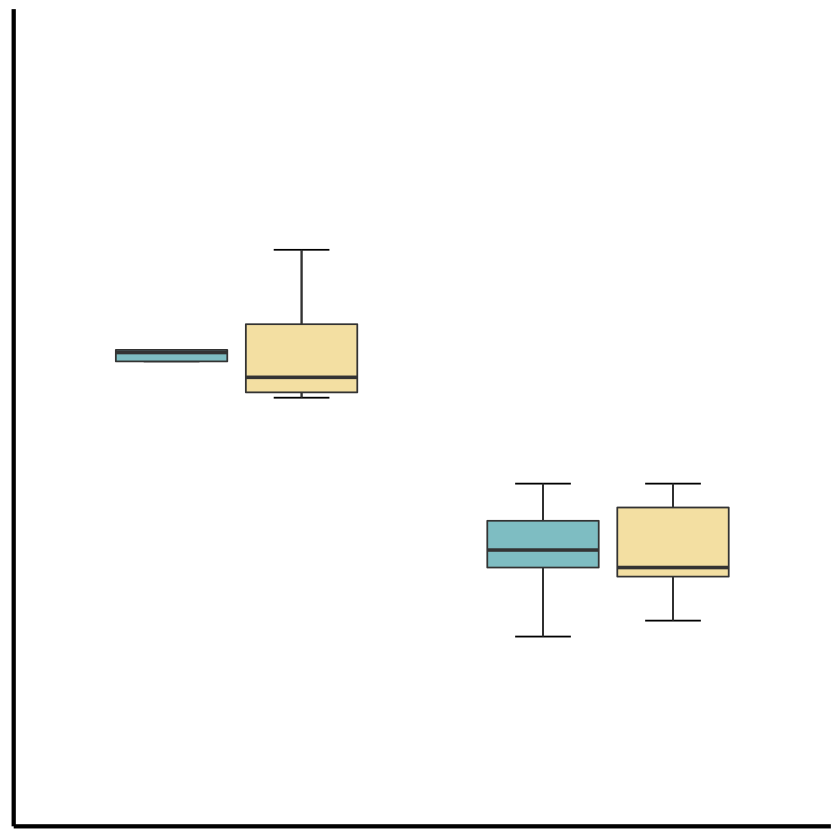

In [35]:
p_box2 <- p_box + theme(axis.text = element_blank(),axis.title = element_blank(),axis.ticks = element_blank(),legend.position = "None")
ggsave("./RNAlight_mRNA_truncate_CV_Result.pdf", p_box2, width = 10, height = 10)
p_box2

In [36]:
lncRNA_TestSet_AUC_df <- data.frame(list(AUC=c(0.718029059449867,0.7091559449866904,0.7362189440993789,0.6365627772848269),model=c("CNN","CNN_RNN","CNN","CNN_RNN"),truncate_keep=c("Five","Five","Three","Three")))
lncRNA_TestSet_AUC_df$truncate_keep <- factor(lncRNA_TestSet_AUC_df$truncate_keep, levels = c("Five","Three"))

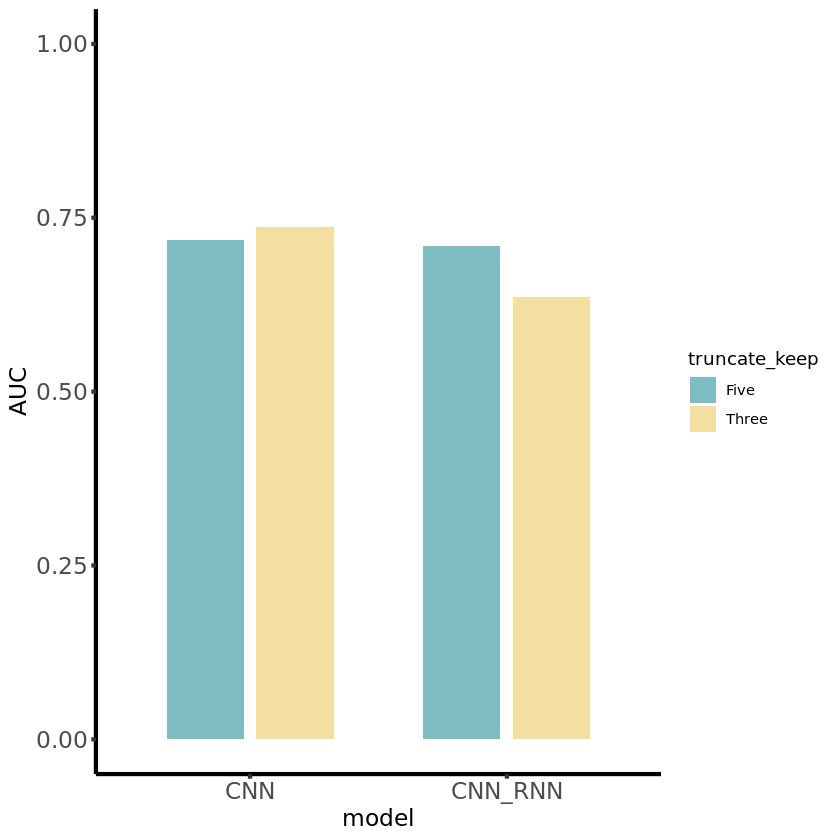

In [37]:
p_auc_RNALight_bar <- ggplot(lncRNA_TestSet_AUC_df  ,aes(x=model,y=AUC,fill = truncate_keep))+
geom_bar(stat="identity",position=position_dodge(0.7),width=0.6)+
ylim(0,1) +
theme_classic()+
scale_fill_manual(values=c("#7ebdc2","#f3dfa2"))+
theme(axis.text = element_text(size=14),
      axis.title = element_text(size=14),
element_line(size = 1.2))
ggsave("./RNAlight_lncRNA_truncate_bar_with_text.pdf",p_auc_RNALight_bar, width = 10, height = 10) 
p_auc_RNALight_bar 

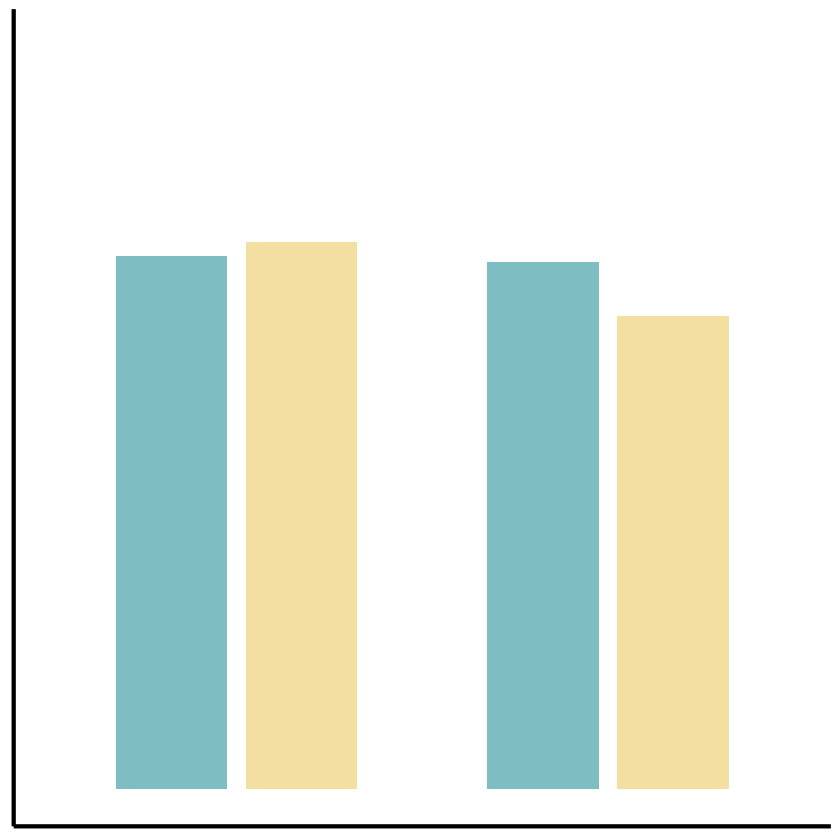

In [38]:
p_auc_RNALight_bar2 <-p_auc_RNALight_bar  + theme(axis.text = element_blank(),axis.title = element_blank(),axis.ticks = element_blank(),legend.position = "None")
ggsave("./RNAlight_lncRNA_truncate_bar.pdf",p_auc_RNALight_bar2 , width = 10, height = 10)
p_auc_RNALight_bar2 

In [39]:
mRNA_TestSet_AUC_df <- data.frame(list(AUC=c(0.7086963097398669,0.5650332728372656,0.7252268602540834,0.5822897761645494),model=c("CNN","CNN_RNN","CNN","CNN_RNN"),truncate_keep=c("Five","Five","Three","Three")))
mRNA_TestSet_AUC_df$truncate_keep <- factor(mRNA_TestSet_AUC_df$truncate_keep, levels = c("Three","Five"))

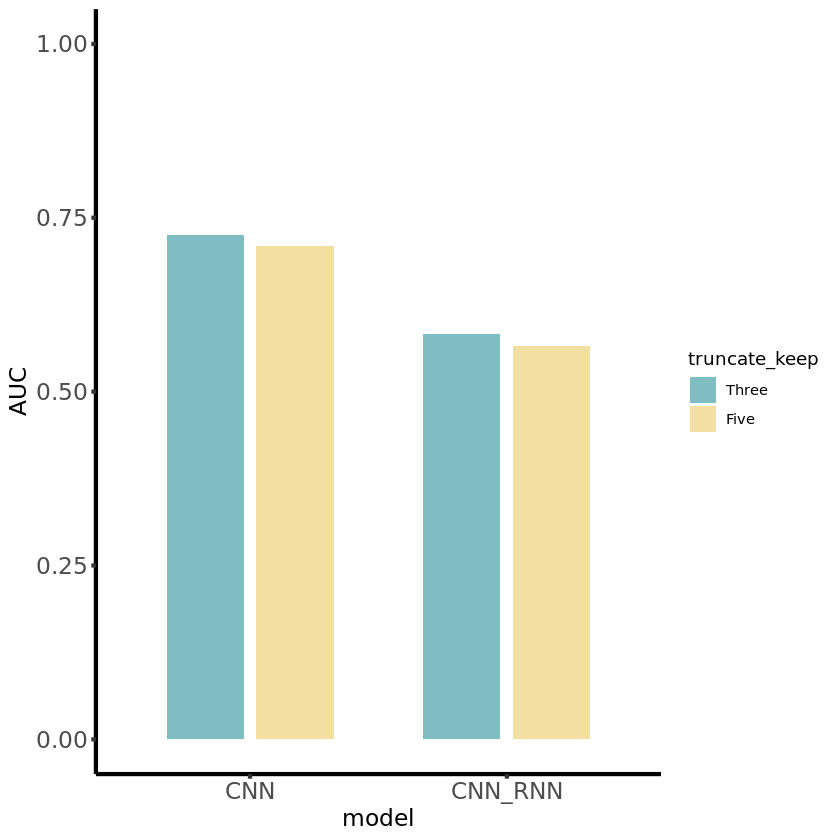

In [40]:
p_auc_RNALight_bar <- ggplot(mRNA_TestSet_AUC_df  ,aes(x=model,y=AUC,fill = truncate_keep))+
geom_bar(stat="identity",position=position_dodge(0.7),width=0.6)+
ylim(0,1) +
theme_classic()+
scale_fill_manual(values=c("#7ebdc2","#f3dfa2"))+
theme(axis.text = element_text(size=14),
      axis.title = element_text(size=14),
element_line(size = 1.2))
ggsave("./RNAlight_mRNA_truncate_bar_with_text.pdf",p_auc_RNALight_bar, width = 10, height = 10) 
p_auc_RNALight_bar 

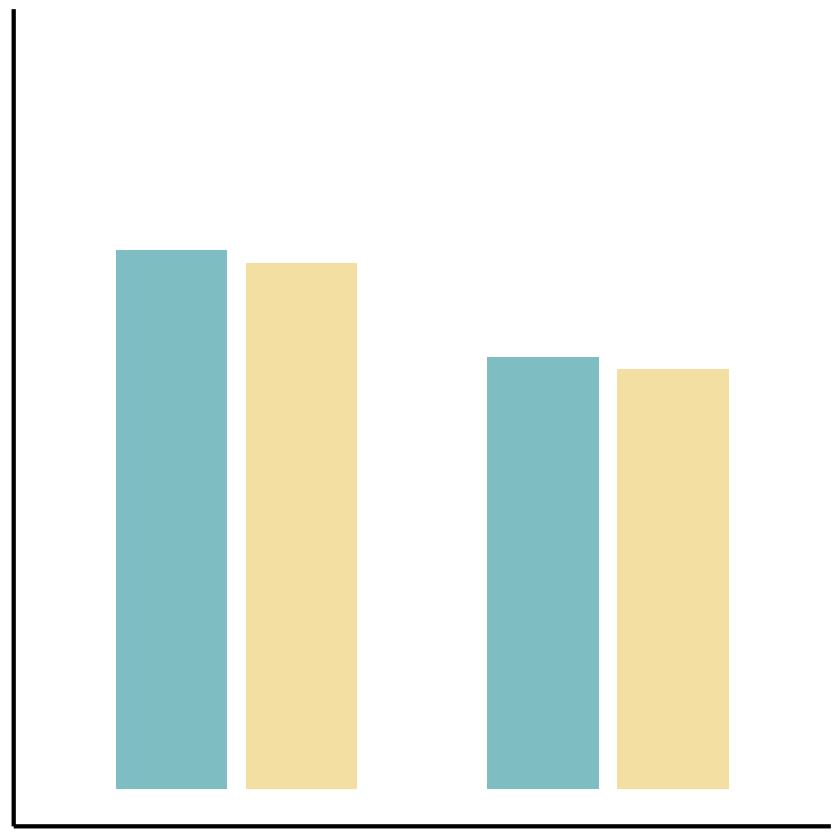

In [41]:
p_auc_RNALight_bar2 <-p_auc_RNALight_bar  + theme(axis.text = element_blank(),axis.title = element_blank(),axis.ticks = element_blank(),legend.position = "None")
ggsave("./RNAlight_mRNA_truncate_bar.pdf",p_auc_RNALight_bar2 , width = 10, height = 10)
p_auc_RNALight_bar2 